In [1]:
import numpy as np
import pandas as pd
import math
from scipy.optimize import fsolve
import matplotlib.pyplot as plt 
import csv

# Q1

In [2]:
I_measured=[]
V_measured=[]
P_measured=[]
filename = 'E:\IITB Sem 2\EE770\Assignment 5\Data.csv'
  
csvf= open(filename, 'r') 
csvreader = csv.reader(csvf) 
fields = next(csvreader) 
    #current=list(csvreader)
for row in csvreader: 
    V_measured.append(float(row[0]))
    I_measured.append(float(row[1]))
    P_measured.append(float(row[2]))

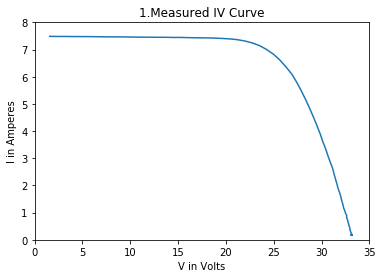

In [3]:
plt.plot(V_measured,I_measured)
plt.axis([0, 35, 0, 8])
plt.title('1.Measured IV Curve')
plt.xlabel('V in Volts')
plt.ylabel('I in Amperes')
plt.show()

In [4]:
Pmax_measured=np.amax(P_measured) # max power at field conditions
print("Pmax_measured=",Pmax_measured)

Pmax_measured= 170.5123341


# Q3 & Q4 Modified IEC procedure

In [5]:
I_stc=[]
V_stc=[]
P_stc=[]
G_stc=1000
T_stc=25
G_measured=862.432
T_measured=52.52
Isc_nm=8.53 #nameplate value
Voc_nm=37.08#nameplate value
Isc_mea=7.49 # calculated by extrapolation
Voc_mea=33.39 #calculated by extrapolation
alpha=0.0003412 #Isc Coefficient(A/degC)
beta=-0.118656 #Voc coefficient(V/degC)

In [6]:
#I_STC values equation
for I in I_measured:
    Istc= I+ (Isc_mea*((G_stc/G_measured)-1))+(alpha*(T_stc-T_measured)) 
    I_stc.append(Istc)

In [7]:
for V in V_measured:
    Vstc= V+(beta*(T_stc-T_measured))
    V_stc.append(Vstc)

In [8]:
P_stc=np.multiply(V_stc,I_stc)
Pmax_stc=np.amax(P_stc)

In [9]:
print("Pamx_stc=",Pmax_stc)
#Voc_stc=np.amax(V_stc)
#Isc_stc=np.amax(I_stc)

Pamx_stc= 226.27142403954747


In [10]:
#plt.plot(V_stc,I_stc)
#plt.axis([0, 40, 0, 10])
#plt.title('2.STC IV Curve(Modified IEC)')
#plt.xlabel('V in Volts')
#plt.ylabel('I in Amperes')
#plt.show()

In [11]:
filename='E:\IITB Sem 2\EE770\Assignment 5\Data_Modstc.csv'
with open(filename, mode='w',newline='') as csvf:
    csvwriter = csv.writer(csvf)

    csvwriter.writerow(['VOLTS', 'AMPS', 'WATTS'])
    csvwriter.writerows([V_stc])
    csvwriter.writerows([I_stc])
    csvwriter.writerows([P_stc])
#newline command does not add blank column

In [12]:
#print(I_stc)

In [13]:
#print(V_stc)

In [14]:
Isc_stc=8.68 #found by extrapolation
Voc_stc=37.75 #found by extrapolation

# SIDT procedure

In [15]:
V_sidt=[]
V_sidt= V_measured

In [16]:
#Voc_sidt=np.amax(V_sidt)
#print(Voc_sidt)

In [17]:
I_sidt=[]
for J in I_measured:
    Isidt=(J/G_measured)*1000.0
    I_sidt.append(Isidt)

In [18]:
gamma=-1.125 #max power coefficient(W/degC)
print(gamma)
print(beta)

-1.125
-0.118656


In [19]:
P_sidt=[]
P_sidt=np.multiply(V_sidt,I_sidt)
Pmax_sidt=np.amax(P_sidt)
print(Pmax_sidt)
#print(P_sidt)

197.71104740295726


In [20]:
filename='E:\IITB Sem 2\EE770\Assignment 5\Data_Sidt.csv'
with open(filename, mode='w',newline='') as csvf:
    csvwriter = csv.writer(csvf)

    csvwriter.writerow(['VOLTS', 'AMPS', 'WATTS'])
    csvwriter.writerows([V_sidt])
    csvwriter.writerows([I_sidt])
    csvwriter.writerows([P_sidt])

In [21]:
#print(V_sidt)

In [22]:
#print(I_sidt)

In [23]:
Isc_sidt=8.68 #found by extrapolation
Voc_sidt=33.41 #found by extrapolation

In [24]:
Isc_stc2= Isc_sidt+(alpha*(T_stc-T_measured))
print(Isc_stc2)

8.670610176


In [25]:
Voc_stc2= Voc_sidt+(beta*(T_stc-T_measured))
print(Voc_stc2)

36.675413119999995


In [26]:
Pmax_stc2= Pmax_sidt+(gamma*(T_stc-T_measured))
print(Pmax_stc2)

228.67104740295727


In [27]:
FF_stc = (Pmax_stc/(Voc_stc*Isc_stc))
FF_stc2= (Pmax_stc2/(Voc_stc2*Isc_stc2))

In [28]:
print("FF_stc=",FF_stc)
print("FF_stc2",FF_stc2)

FF_stc= 0.6905466598698308
FF_stc2 0.7190953913039515


In [29]:
FF_measured = (Pmax_measured/(Voc_mea*Isc_mea))
print("FF_measured=",FF_measured)

FF_measured= 0.6818008881563558
